In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set(rc={'figure.autolayout': True})
file_names = ['local_openai', 'local_local', 'openai_openai', 'openai_local']

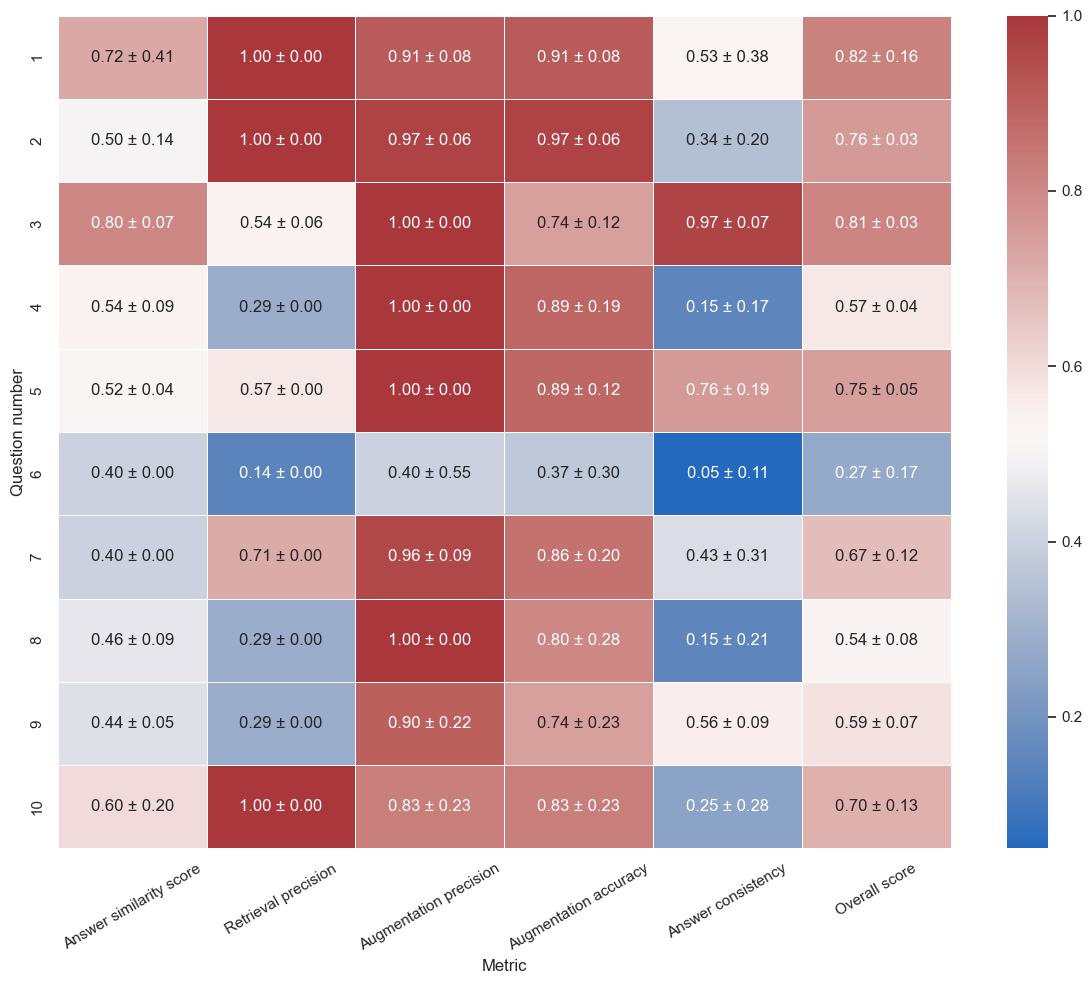

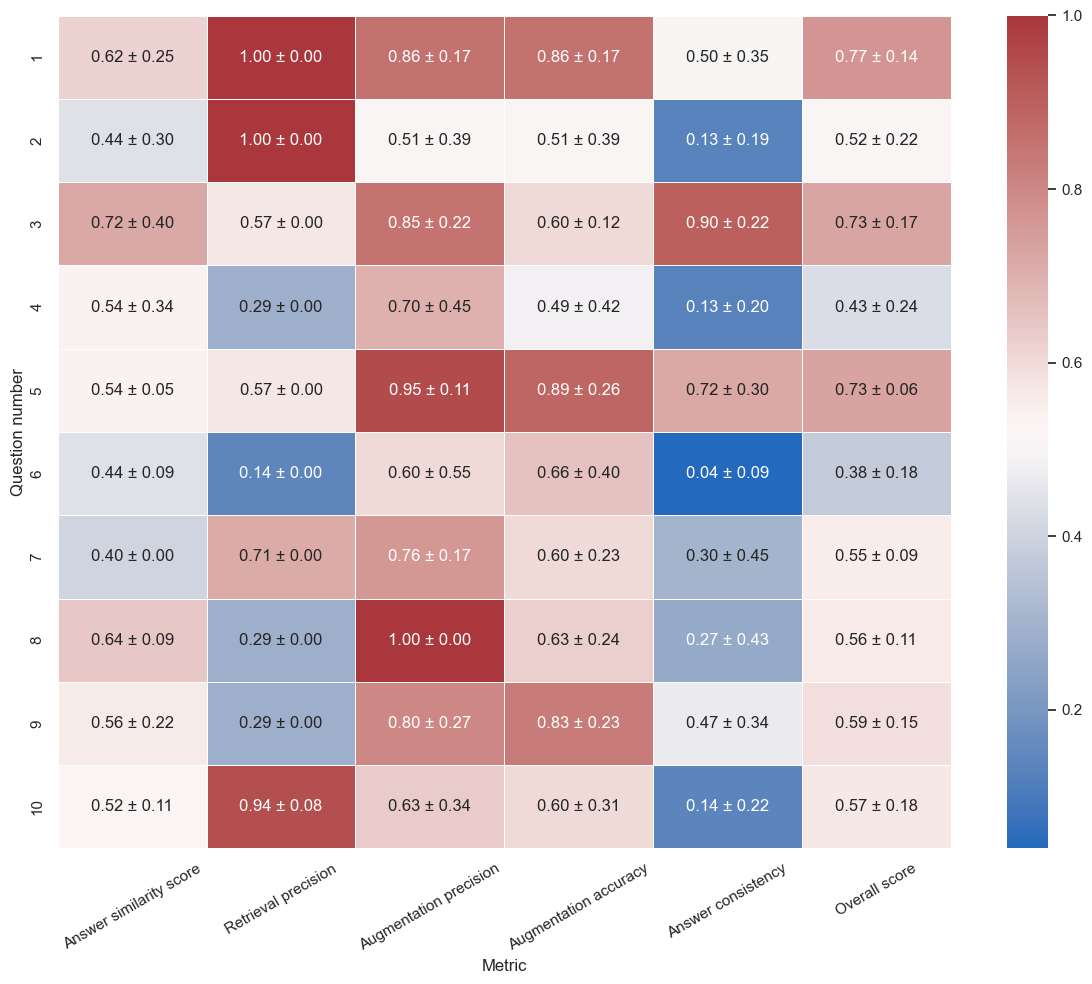

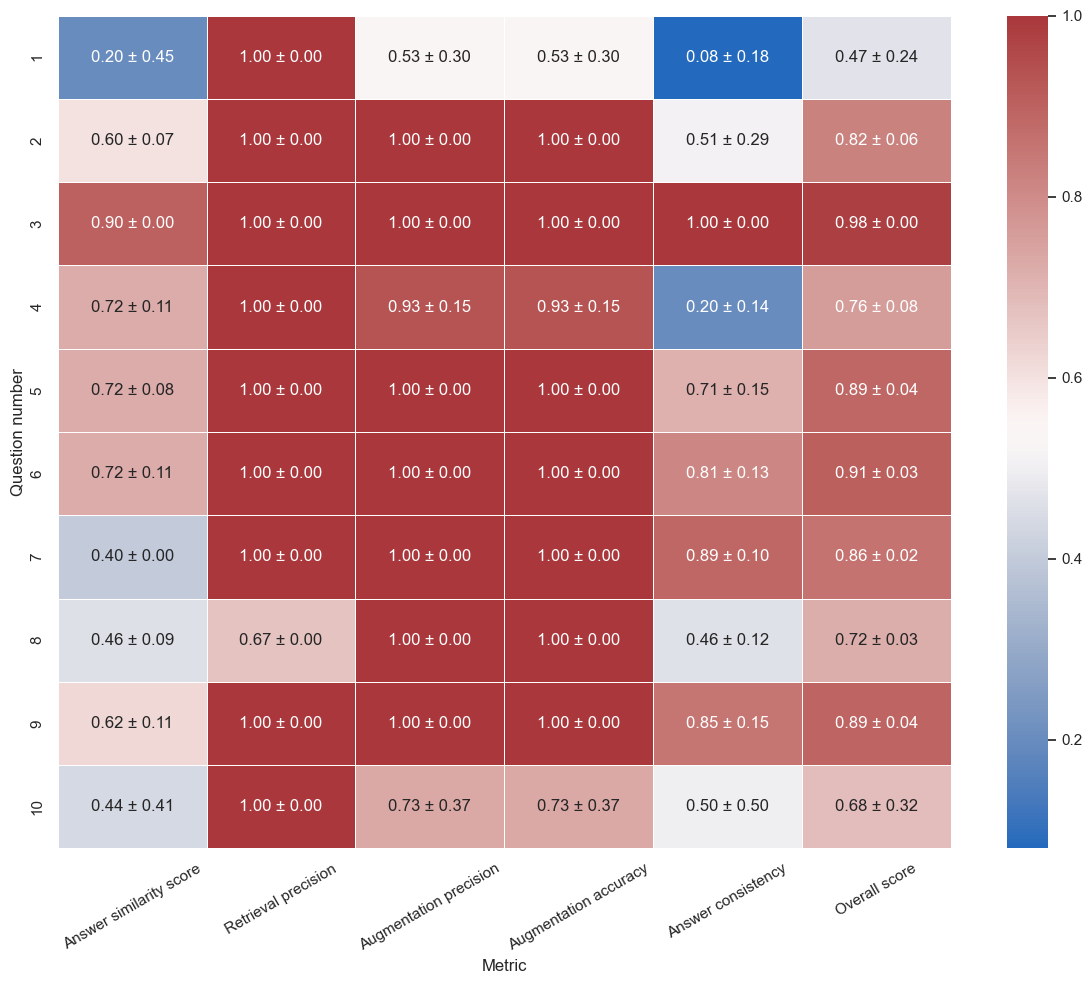

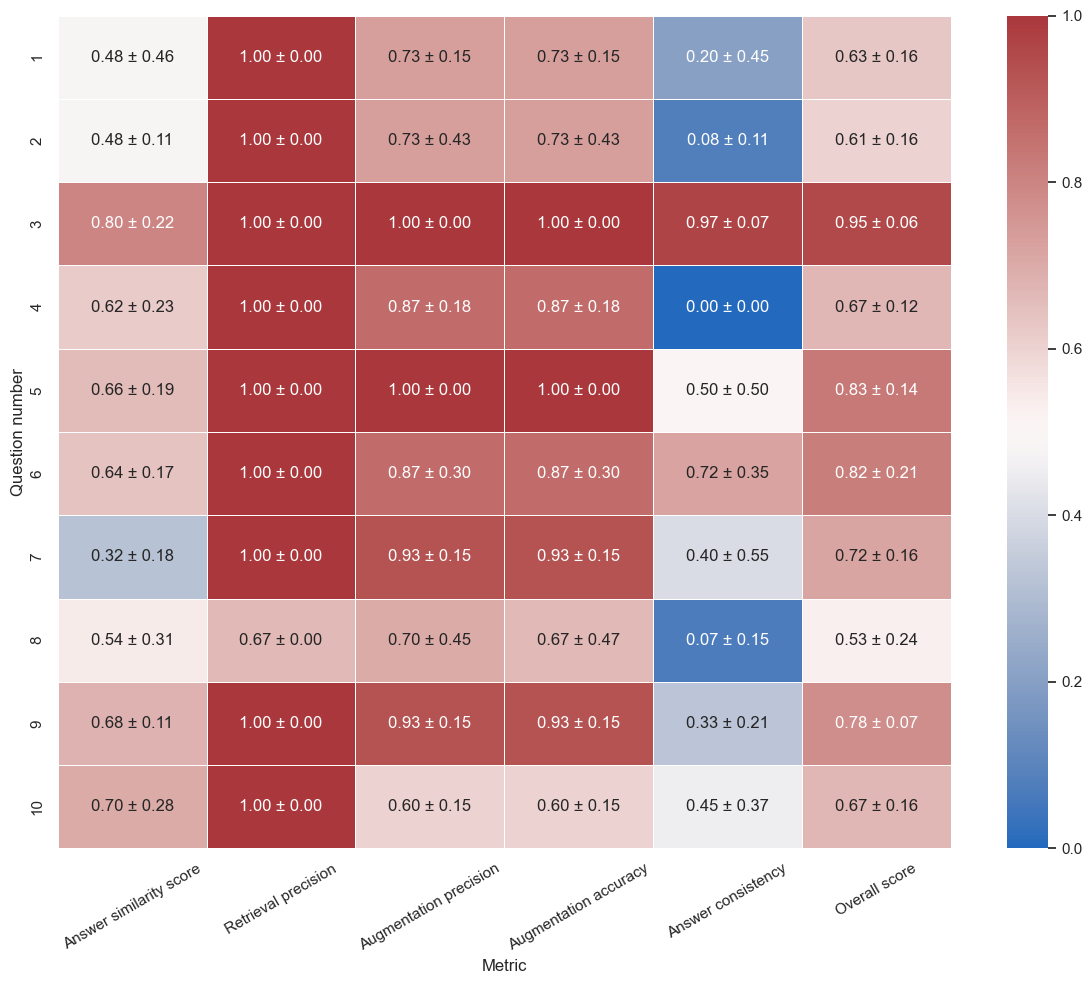

In [6]:
for file_name in file_names:
    score_df = pd.read_json(f'../data/evaluation/automatic/{file_name}.json')
    score_df = score_df.drop(['Reference answer', 'LLM answer', 'Retrieved context'], axis=1)
    score_df['Answer similarity score'] = score_df['Answer similarity score'] / 5
    mean_data = score_df.groupby(['Question']).mean()
    std_data = score_df.groupby('Question').std()
    heatmap_data = pd.DataFrame(index=mean_data.index, columns=mean_data.columns)
    for col in mean_data.columns:
        heatmap_data[col] = [f"{mean:.2f} ± {std:.2f}" for mean, std in zip(mean_data[col], std_data[col])]
    plt.figure(figsize=(12, 10))
    sns.heatmap(mean_data, annot=heatmap_data, fmt='', cmap='vlag', linewidths=.5, cbar_kws={"label": ""}, yticklabels=range(1, 11, 1))
    plt.xticks(rotation=30)
    plt.title('')
    plt.ylabel('Question number')
    plt.xlabel('Metric')
    # plt.show()
    plt.subplots_adjust(bottom=0.15)
    plt.tight_layout()
    plt.savefig(f'../data/evaluation/automatic/{file_name}_heatmap.png')

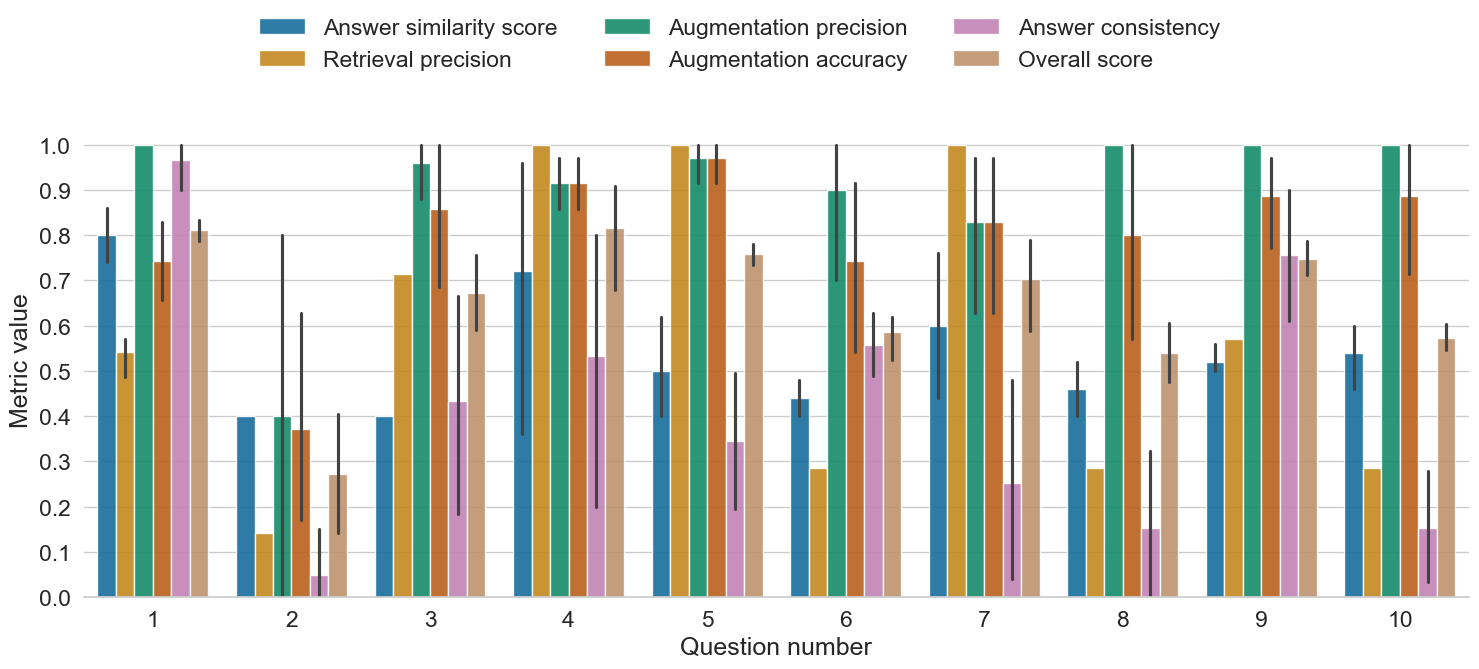

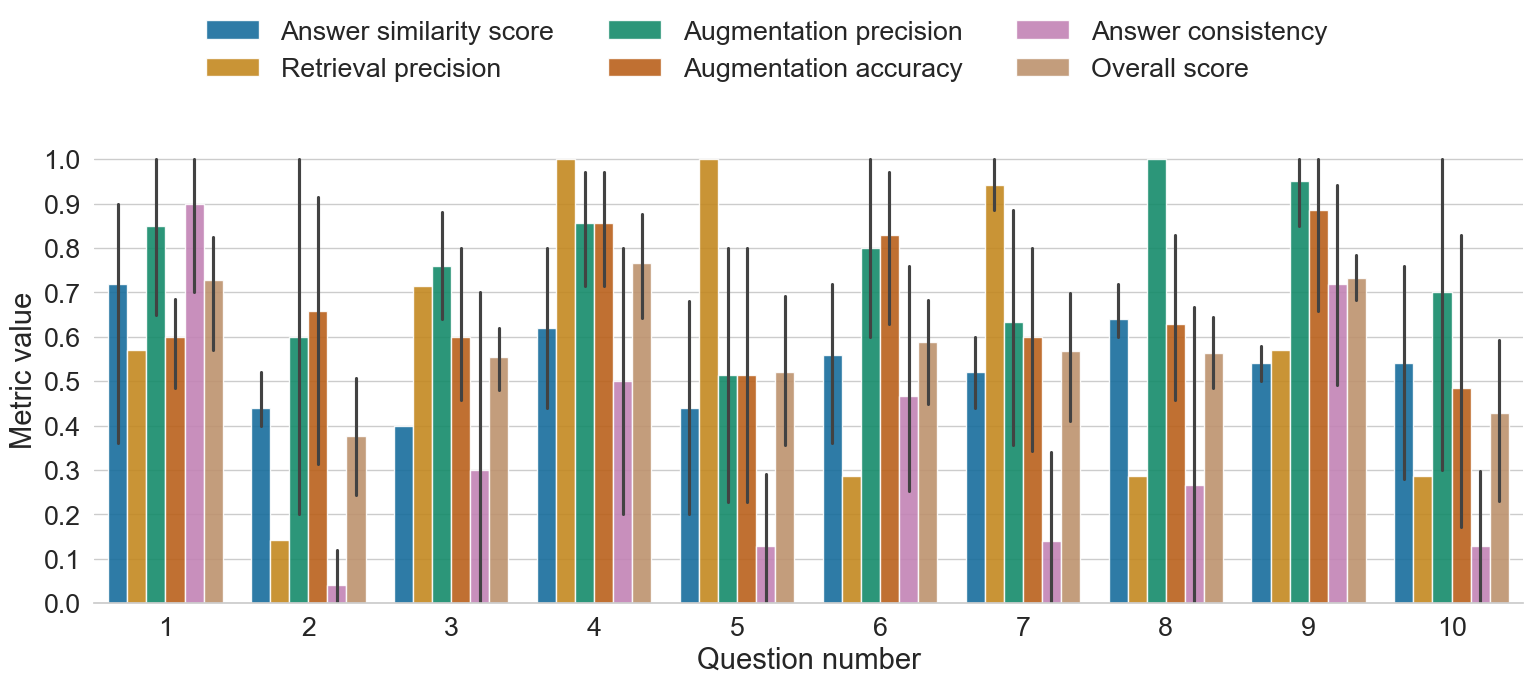

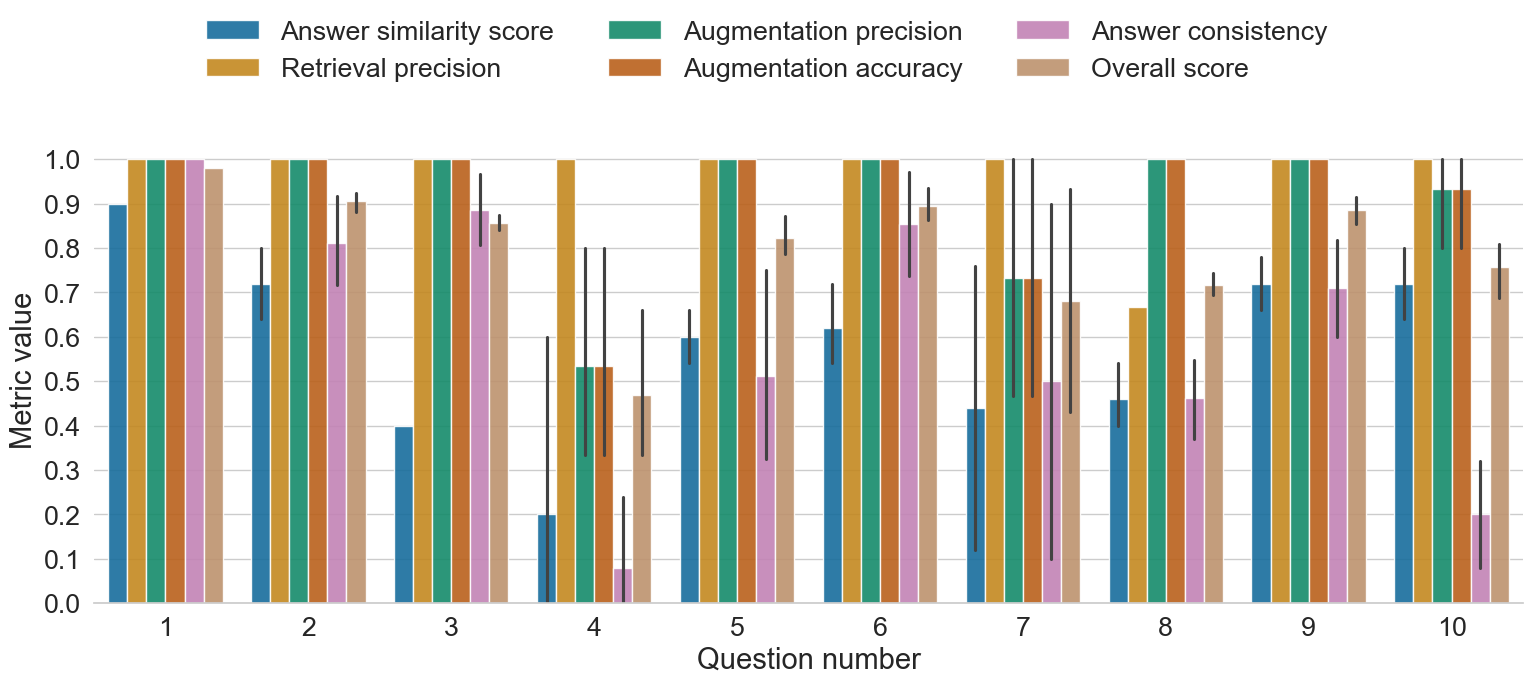

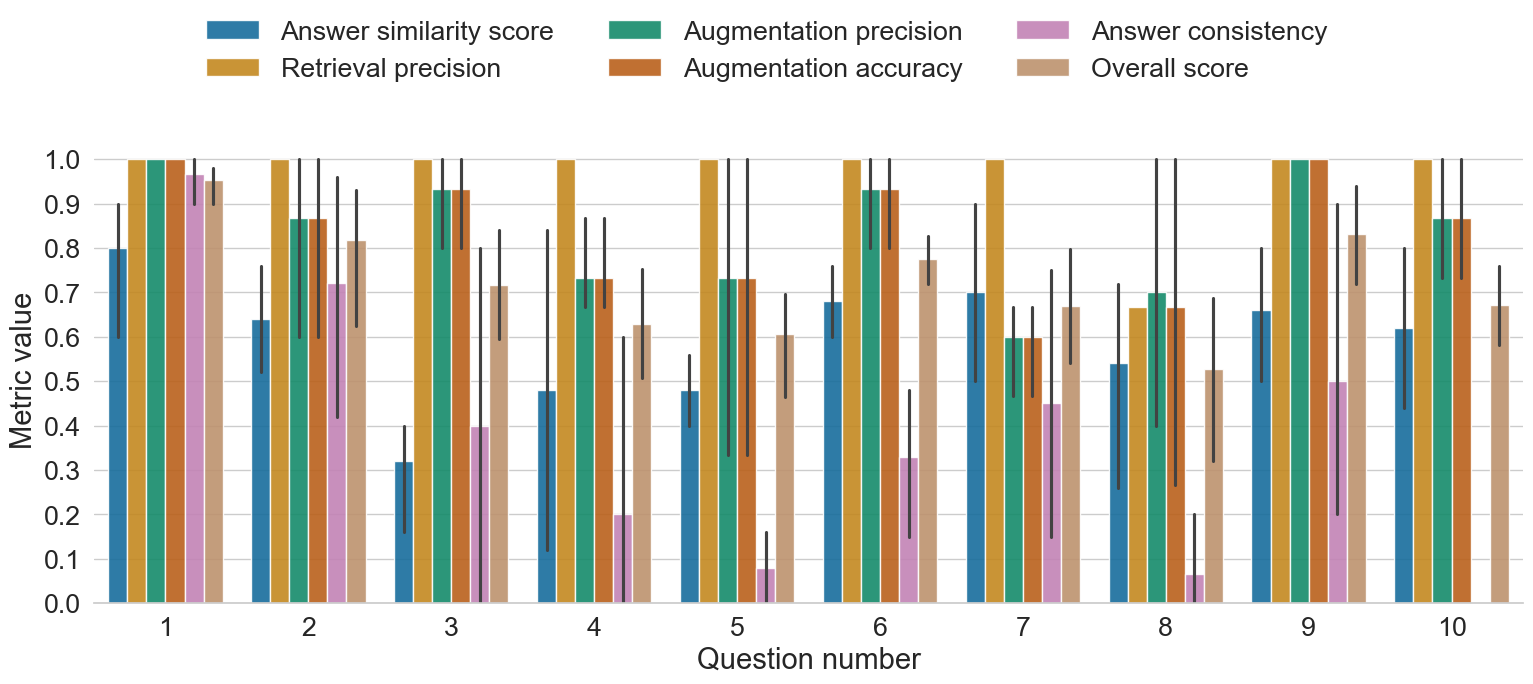

In [24]:
for file_name in file_names:
    score_df = pd.read_json(f'../data/evaluation/automatic/{file_name}.json')
    score_df = score_df.drop(['Reference answer', 'LLM answer', 'Retrieved context'], axis=1)
    score_df['Answer similarity score'] = score_df['Answer similarity score'] / 5
    
    melted_df = pd.melt(score_df, id_vars=['Question'], var_name='Metric', value_name='Value')
    sns.set_style("whitegrid")
    g = sns.catplot(x='Question', y='Value', hue='Metric', data=melted_df, kind='bar', height=6, aspect=2, alpha=0.9)
    g.despine(left=True)
    g.set_axis_labels('Question number', 'Metric value')
    sns.move_legend(
        g, "lower center",
        bbox_to_anchor=(.5, 1), ncol=len(score_df.columns) / 2, title=None, frameon=False,
    )
    sns.set_context("notebook", font_scale=1.75)
    plt.xticks(ticks=range(0,10), labels=range(1,11))
    sns.set_palette("colorblind")
    plt.yticks(ticks=np.linspace(0, 1.0, 11))
    plt.tight_layout()
    plt.savefig(f'../data/evaluation/automatic/{file_name}_catplot.png', dpi=600)

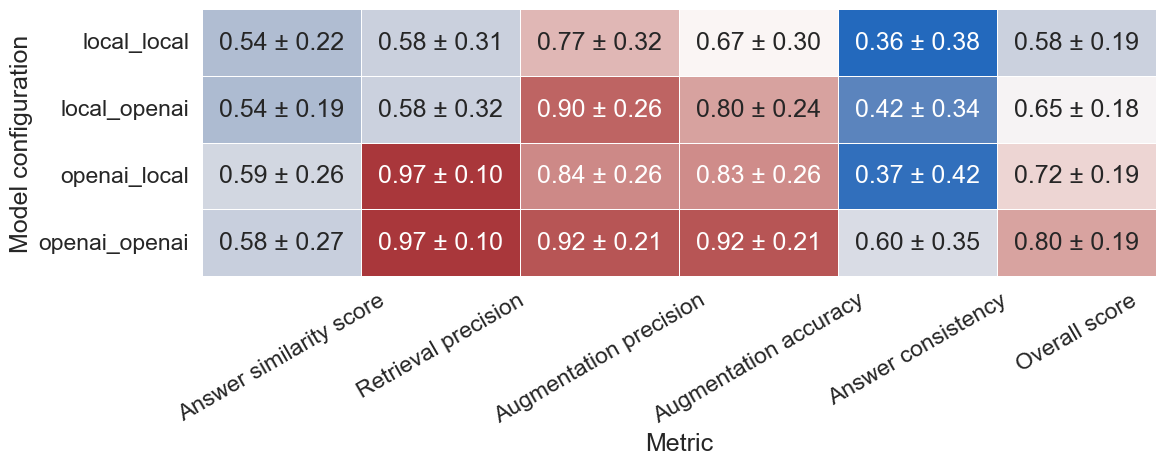

In [23]:
all_data = pd.DataFrame()
for file_name in file_names:
    score_df = pd.read_json(f'../data/evaluation/automatic/{file_name}.json')
    score_df = score_df.drop(['Reference answer', 'LLM answer', 'Retrieved context', 'Question'], axis=1)
    score_df['Answer similarity score'] = score_df['Answer similarity score'] / 5
    score_df['Configuration'] = file_name
    all_data = pd.concat([all_data, score_df], axis=0)
    
    mean_data = all_data.groupby('Configuration').mean()
    std_data = all_data.groupby('Configuration').std()
    heatmap_data = pd.DataFrame(index=mean_data.index, columns=mean_data.columns)
    for col in mean_data.columns:
        heatmap_data[col] = [f"{mean:.2f} ± {std:.2f}" for mean, std in zip(mean_data[col], std_data[col])]
    
plt.figure(figsize=(12, 5))
g = sns.heatmap(mean_data, annot=heatmap_data, fmt='', cmap='vlag', linewidths=.5, cbar=False)
sns.set_context("notebook", font_scale=1.5)
# g.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(score_df.columns) // 2)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.title('')
plt.ylabel('Model configuration')
plt.xlabel('Metric')
# plt.show()
plt.tight_layout()
plt.savefig(f'../data/evaluation/automatic/models_comparison_heatmap.png', dpi=600)